In [2]:
import pandas as pd
import numpy as np

import datetime
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)}, font_scale=2.2)
sns.set_style(style='whitegrid')

from tqdm import tqdm

import sys
from pathlib import Path

# KPI

In [3]:
df = pd.read_csv('motivating_figures_data/phase2_train/phase2_train.csv')
df['date'] = pd.to_datetime(df['timestamp'],unit='s')

df = df[df['date']>='2016-10-29 00:00:00']
df = df[df['date']<='2016-11-03 23:59:00']
df

,timestamp,value,label,KPI ID,date
20595,1477699200,0.016757,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:00:00
20596,1477699260,0.008692,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:01:00
20597,1477699320,0.008760,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:02:00
20598,1477699380,0.007016,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:03:00
20599,1477699440,0.010812,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:04:00
...,...,...,...,...,...
29218,1478217300,0.005920,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:55:00
29219,1478217360,0.005622,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:56:00
29220,1478217420,0.007355,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:57:00
29221,1478217480,0.011283,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:58:00


In [4]:
df_resampled = df.resample('25min', on='date').mean()[['value']]
df_resampled.insert(0, 'date', df_resampled.index)
df_resampled

,date,value
date,,
2016-10-29 00:00:00,2016-10-29 00:00:00,0.014253
2016-10-29 00:25:00,2016-10-29 00:25:00,0.018914
2016-10-29 00:50:00,2016-10-29 00:50:00,0.024857
2016-10-29 01:15:00,2016-10-29 01:15:00,0.033835
2016-10-29 01:40:00,2016-10-29 01:40:00,0.054965
...,...,...
2016-11-03 22:05:00,2016-11-03 22:05:00,0.002002
2016-11-03 22:30:00,2016-11-03 22:30:00,0.003779
2016-11-03 22:55:00,2016-11-03 22:55:00,0.005345


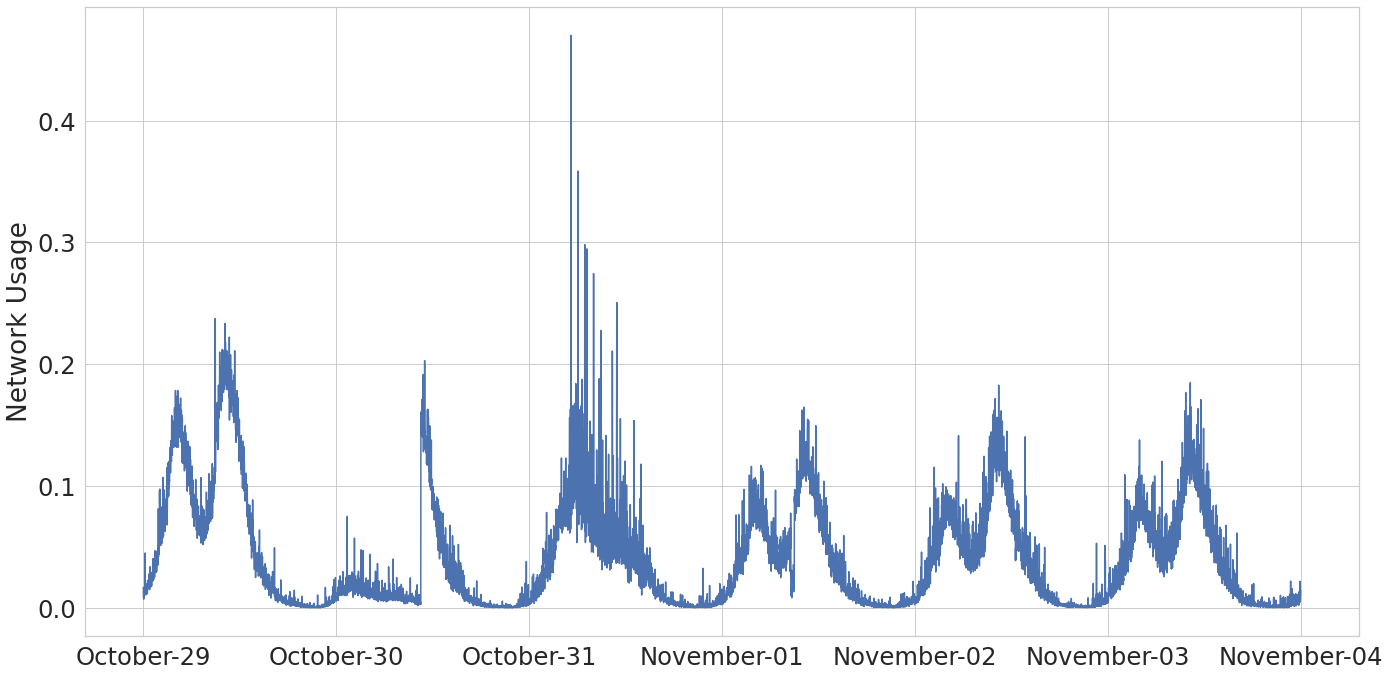

In [5]:
fig, ax = plt.subplots()
plt.plot(df['date'], df['value'])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%B-%d"))
plt.ylabel('Network Usage');plt.tight_layout()
plt.savefig('figures/motivating_figures/kpi.svg')

# Synthetic Example

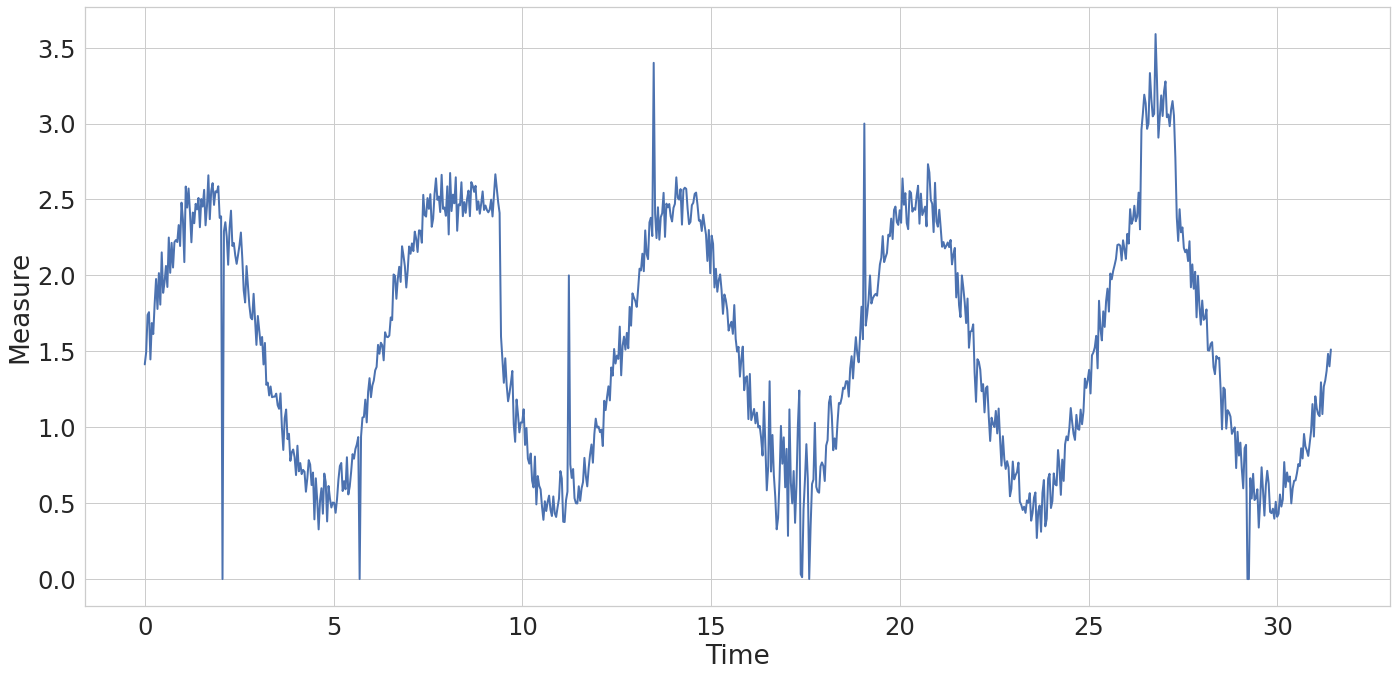

In [10]:
df = pd.read_pickle('streaming_example/df.pickle')
plt.plot(df['time'], df['measure'], linewidth=2)
plt.xlabel('Time');plt.ylabel('Measure');plt.tight_layout()
plt.savefig('figures/motivating_figures/synthetic_example_streaming.svg')

## KPI Old Example

In [64]:
df = pd.read_csv('motivating_figures_data/KPI_train.csv')
df['date'] = pd.to_datetime(df['timestamp'],unit='s')
df = df.head(10000)
df

,timestamp,value,label,KPI ID,date
0,1493568000,1.901639,0,02e99bd4f6cfb33f,2017-04-30 16:00:00
1,1493568060,1.786885,0,02e99bd4f6cfb33f,2017-04-30 16:01:00
2,1493568120,2.000000,0,02e99bd4f6cfb33f,2017-04-30 16:02:00
3,1493568180,1.885246,0,02e99bd4f6cfb33f,2017-04-30 16:03:00
4,1493568240,1.819672,0,02e99bd4f6cfb33f,2017-04-30 16:04:00
...,...,...,...,...,...
9995,1494182460,2.901639,0,02e99bd4f6cfb33f,2017-05-07 18:41:00
9996,1494182520,3.065574,0,02e99bd4f6cfb33f,2017-05-07 18:42:00
9997,1494182580,3.081967,0,02e99bd4f6cfb33f,2017-05-07 18:43:00
9998,1494182640,3.180328,0,02e99bd4f6cfb33f,2017-05-07 18:44:00


In [65]:
df_resampled = df.resample('5min', on='date').mean()[['value']]
df_resampled.insert(0, 'date', df_resampled.index)
df_resampled

,date,value
date,,
2017-04-30 16:00:00,2017-04-30 16:00:00,1.878689
2017-04-30 16:05:00,2017-04-30 16:05:00,1.924590
2017-04-30 16:10:00,2017-04-30 16:10:00,1.908197
2017-04-30 16:15:00,2017-04-30 16:15:00,1.960656
2017-04-30 16:20:00,2017-04-30 16:20:00,1.996721
...,...,...
2017-05-07 18:25:00,2017-05-07 18:25:00,2.895082
2017-05-07 18:30:00,2017-05-07 18:30:00,2.944262
2017-05-07 18:35:00,2017-05-07 18:35:00,2.829508


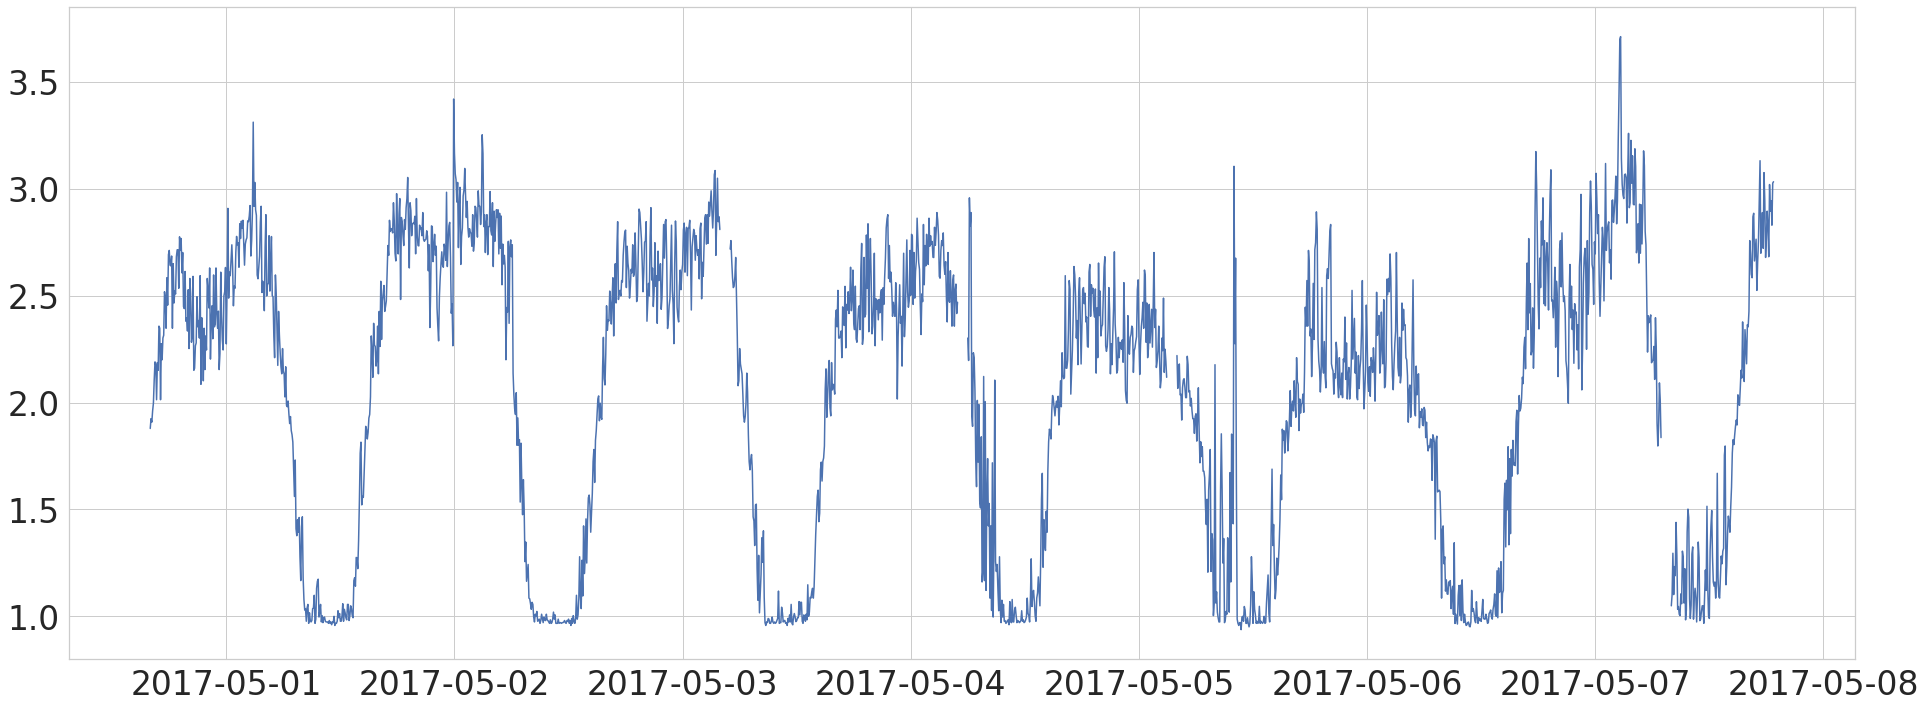

In [66]:
plt.plot(df_resampled['date'], df_resampled['value'])

In [102]:
df = pd.read_csv('motivating_figures_data/phase2_train/phase2_train.csv')
df['date'] = pd.to_datetime(df['timestamp'],unit='s')

df = df[df['date']>='2016-10-29 00:00:00']
df = df[df['date']<='2016-11-03 23:59:00']
df

,timestamp,value,label,KPI ID,date
20595,1477699200,0.016757,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:00:00
20596,1477699260,0.008692,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:01:00
20597,1477699320,0.008760,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:02:00
20598,1477699380,0.007016,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:03:00
20599,1477699440,0.010812,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-10-29 00:04:00
...,...,...,...,...,...
29218,1478217300,0.005920,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:55:00
29219,1478217360,0.005622,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:56:00
29220,1478217420,0.007355,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:57:00
29221,1478217480,0.011283,0,da10a69f-d836-3baa-ad40-3e548ecf1fbd,2016-11-03 23:58:00


In [103]:
df_resampled = df.resample('20min', on='date').mean()[['value']]
df_resampled.insert(0, 'date', df_resampled.index)
df_resampled

,date,value
date,,
2016-10-29 00:00:00,2016-10-29 00:00:00,0.014035
2016-10-29 00:20:00,2016-10-29 00:20:00,0.017115
2016-10-29 00:40:00,2016-10-29 00:40:00,0.021762
2016-10-29 01:00:00,2016-10-29 01:00:00,0.027391
2016-10-29 01:20:00,2016-10-29 01:20:00,0.034520
...,...,...
2016-11-03 22:20:00,2016-11-03 22:20:00,0.002342
2016-11-03 22:40:00,2016-11-03 22:40:00,0.005302
2016-11-03 23:00:00,2016-11-03 23:00:00,0.004811


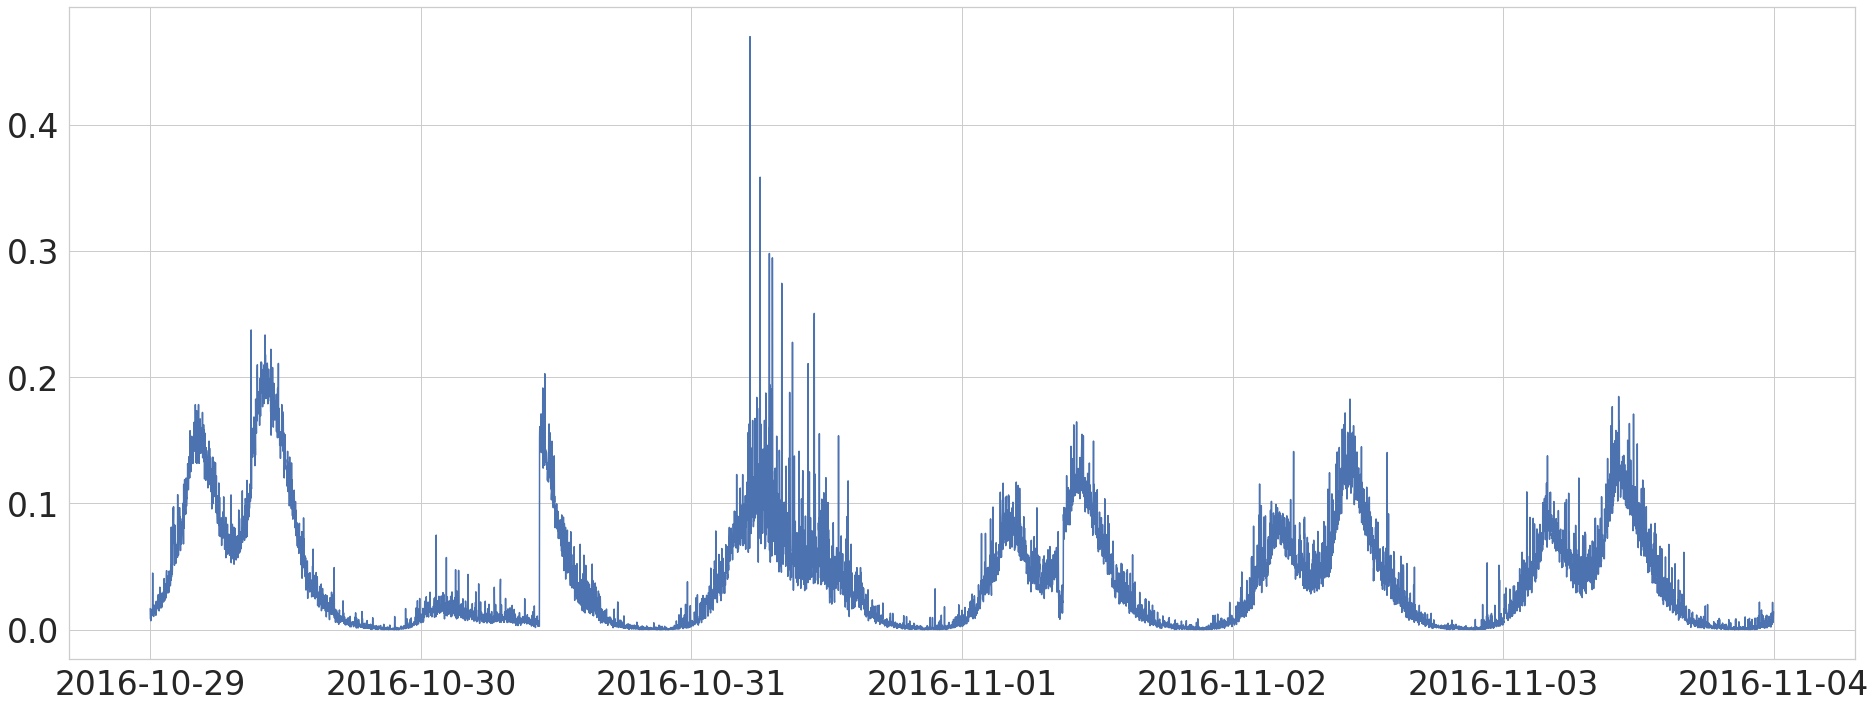

In [104]:
plt.plot(df['date'], df['value'])
plt.ylabel('Network Usage');plt.xlabel('')

# Twitter